In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

"""
This notebook contains solved exercises from ISLP chapter 1, that are related to the 'College.csv' dataset.
"""

college = pd.read_csv("/kaggle/input/islr-college-data-set/College.csv")
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [2]:
#renaming the first column into 'college', since it is the entries in it 
college3 = college.rename({'Unnamed: 0': 'College'},axis=1)
#set_index changes the indices of the rows to an existing column, in this case (the labels of rows)
college3 = college3.set_index('College')
college = college3

In [3]:
#general info about the dataset
college.describe()
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

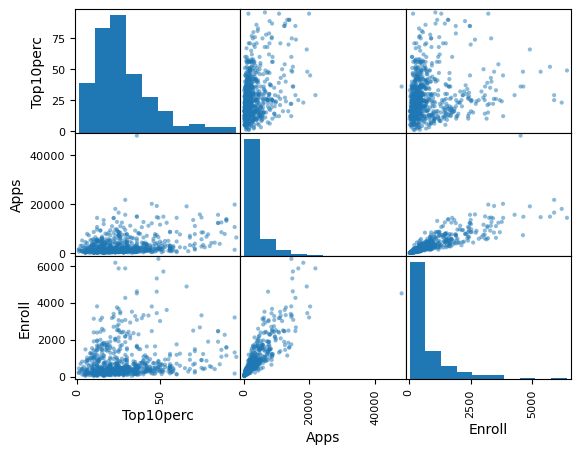

In [4]:
#plotting the Apps, Enroll, Top10perc columns of the frame 
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

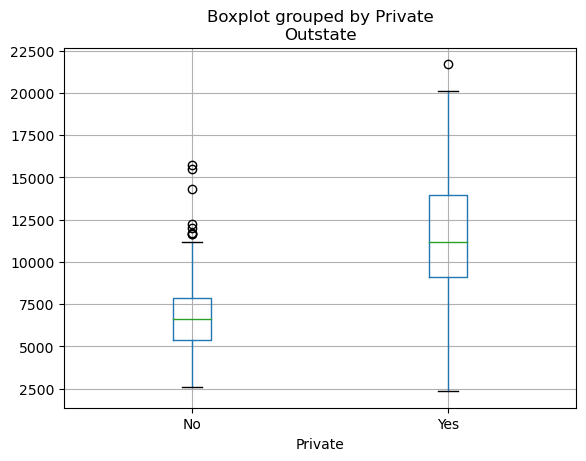

In [5]:
#boxplots of Outstate versus Private
bp = college.boxplot('Outstate','Private')

In [6]:
#Create a new qualitative variable, called Elite, by binning the
#Top10perc variable into two groups based on whether or not the
#proportion of students coming from the top 10% of their high
#school classes exceeds 50%.

#the second argument in the cut function -- the bins to use (no. of categories). the array contains two intervals: 0-0.5,
#0.5-1. this categorically splits the Top10perc column
college['Elite'] = pd.cut(college['Top10perc'],
[0,50,100],
labels=['No', 'Yes'])

college['Elite']
#TODO: read binning docs



College
Abilene Christian University       No
Adelphi University                 No
Adrian College                     No
Agnes Scott College               Yes
Alaska Pacific University          No
                                 ... 
Worcester State College            No
Xavier University                  No
Xavier University of Louisiana     No
Yale University                   Yes
York College of Pennsylvania       No
Name: Elite, Length: 777, dtype: category
Categories (2, object): ['No' < 'Yes']

In [7]:
#FOR THE ABOVE EXERCISE
#the code from the book contains wrong code. it should be [0,50,100], not [0,0.5,1], since Top10perc contains values outside of the range. 
#the original code from the book results in a column full of NaN values, which is obviously not the desired result. 

In [8]:
#displaying, how many elite unis there are 
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

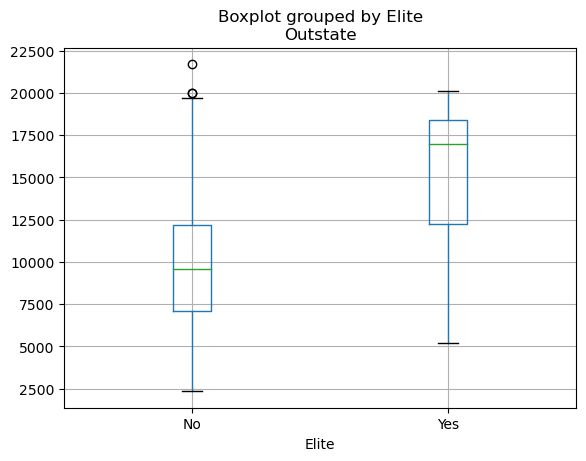

In [9]:
#boxplot of Outstate versus Elite 
bp = college.boxplot('Outstate','Elite')

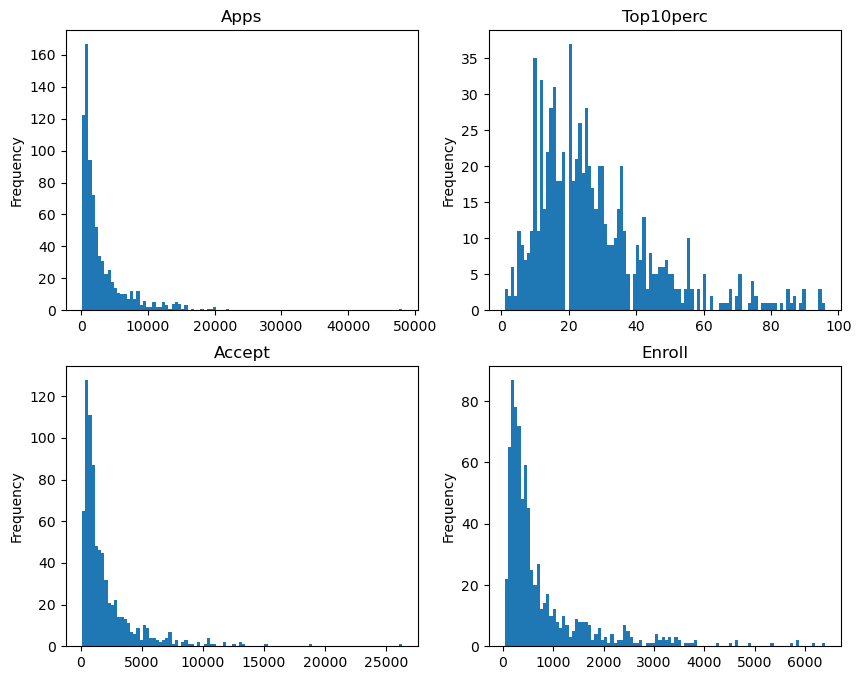

In [10]:
#Use the plot.hist() method of college
#to produce some histograms with differing numbers of bins for a few of the quantitative variables
#The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four
#plots can be made simultaneously. By changing the arguments
#you can divide the screen up in other combinations.

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs = axs.flatten()
cols = ['Apps', 'Top10perc', 'Accept', 'Enroll']

for i, col in enumerate(cols):
    college[col].plot.hist(ax=axs[i], bins=100)
    axs[i].set_title(col)

In [11]:
#a bit of further investigation of the dataset

#general info about the dataset -- columns, non-null entries in columns etc.
college.info()

#displaying the last 5 columns
college.tail()

#displaying all row labels
college.index

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    object  
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null 

Index(['Abilene Christian University', 'Adelphi University', 'Adrian College',
       'Agnes Scott College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College',
       ...
       'Winthrop University', 'Wisconsin Lutheran College',
       'Wittenberg University', 'Wofford College',
       'Worcester Polytechnic Institute', 'Worcester State College',
       'Xavier University', 'Xavier University of Louisiana',
       'Yale University', 'York College of Pennsylvania'],
      dtype='object', name='College', length=777)